# 1. 데이터 확인

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Heart_Disease_Prediction.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [3]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [4]:
df.rename(lambda x: x.lower().strip().replace(' ', '_'), axis = 'columns', inplace = True)
df.columns

Index(['age', 'sex', 'chest_pain_type', 'bp', 'cholesterol', 'fbs_over_120',
       'ekg_results', 'max_hr', 'exercise_angina', 'st_depression',
       'slope_of_st', 'number_of_vessels_fluro', 'thallium', 'heart_disease'],
      dtype='object')

In [5]:
df['heart_disease'] = np.where(df['heart_disease'] == 'Presence', 1, 0)
# df = df.replace({'heart_disease': {'Presence': 1, 'Absence': 0}})
df.head()

,age,sex,chest_pain_type,bp,cholesterol,fbs_over_120,ekg_results,max_hr,exercise_angina,st_depression,slope_of_st,number_of_vessels_fluro,thallium,heart_disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [6]:
df['heart_disease'].value_counts()

0    150
1    120
Name: heart_disease, dtype: int64

**결측치 없음.**

# 2. EDA

<AxesSubplot: >

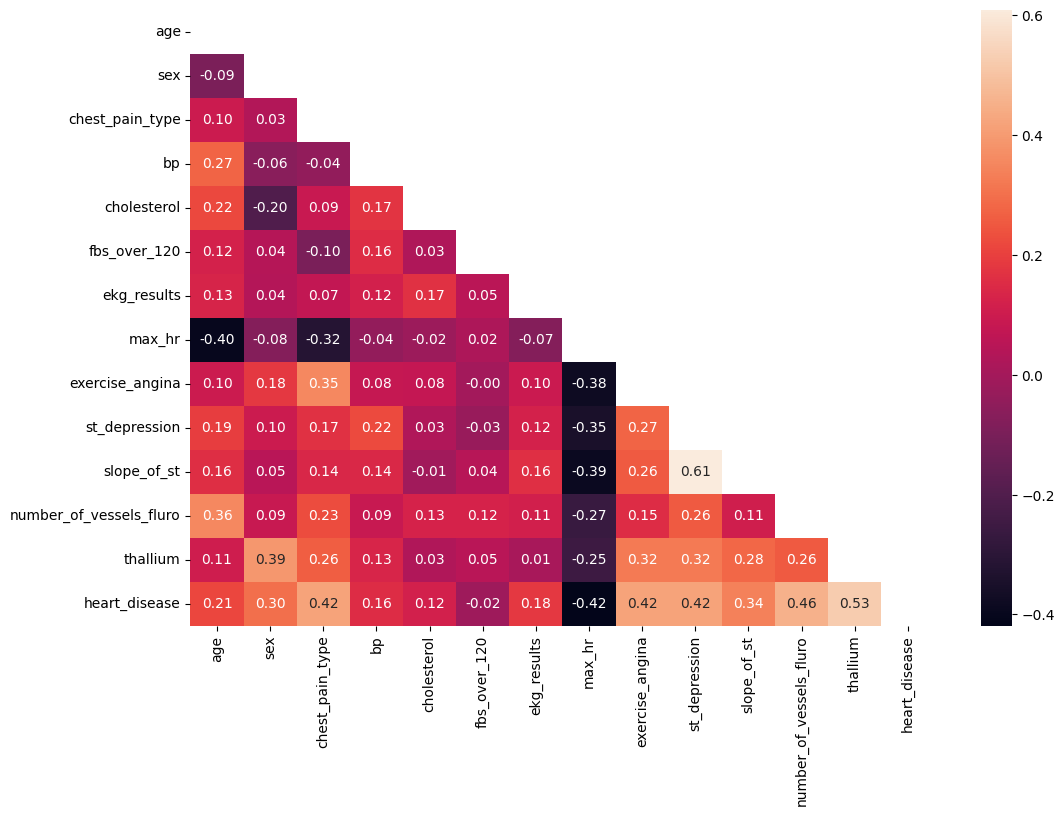

In [9]:
corr = df.corr()
plt.figure(figsize = (12,8))
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, fmt = ".2f", mask = mask, annot = True)

In [10]:
corr['heart_disease'].sort_values(ascending = False)

heart_disease              1.000000
thallium                   0.525020
number_of_vessels_fluro    0.455336
exercise_angina            0.419303
st_depression              0.417967
chest_pain_type            0.417436
slope_of_st                0.337616
sex                        0.297721
age                        0.212322
ekg_results                0.182091
bp                         0.155383
cholesterol                0.118021
fbs_over_120              -0.016319
max_hr                    -0.418514
Name: heart_disease, dtype: float64

In [14]:
X = df.drop(['heart_disease'], axis = 1)
y = df[['heart_disease']]

In [15]:
ob_index = []

for col in X.columns:
    if X[col].dtype == object:
        ob_index.append(col)

num_index = X.columns.difference(ob_index)

print(ob_index) ; print(num_index)

[]
Index(['age', 'sex', 'chest_pain_type', 'bp', 'cholesterol', 'fbs_over_120',
       'ekg_results', 'max_hr', 'exercise_angina', 'st_depression',
       'slope_of_st', 'number_of_vessels_fluro', 'thallium'],
      dtype='object')


**전부 수치형 변수? 확인 필요**

In [16]:
len(num_index)

13

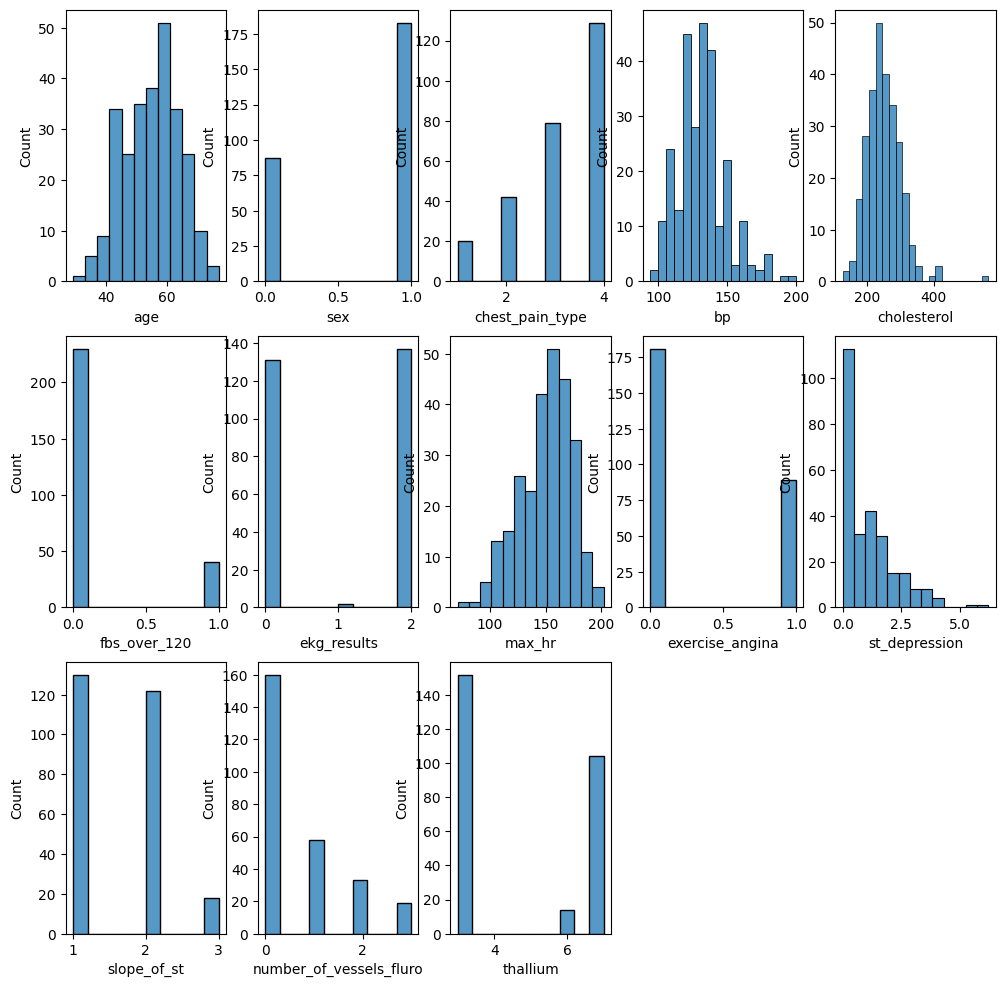

In [24]:
plt.figure(figsize = (12,12))
for i, col in enumerate(num_index):
    ax = plt.subplot(3, 5, i+1)
    sns.histplot(x = str(col), data = X)
plt.show()

In [25]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      270 non-null    int64  
 1   sex                      270 non-null    int64  
 2   chest_pain_type          270 non-null    int64  
 3   bp                       270 non-null    int64  
 4   cholesterol              270 non-null    int64  
 5   fbs_over_120             270 non-null    int64  
 6   ekg_results              270 non-null    int64  
 7   max_hr                   270 non-null    int64  
 8   exercise_angina          270 non-null    int64  
 9   st_depression            270 non-null    float64
 10  slope_of_st              270 non-null    int64  
 11  number_of_vessels_fluro  270 non-null    int64  
 12  thallium                 270 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 27.5 KB


In [28]:
ob_index = X.columns[[1,2,5,6,8,10,11,12]]
num_index = X.columns.difference(ob_index)

print(ob_index) ; print(num_index)

Index(['sex', 'chest_pain_type', 'fbs_over_120', 'ekg_results',
       'exercise_angina', 'slope_of_st', 'number_of_vessels_fluro',
       'thallium'],
      dtype='object')
Index(['age', 'bp', 'cholesterol', 'max_hr', 'st_depression'], dtype='object')


# 3. 전처리

In [29]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [32]:
tr = [('ob', OneHotEncoder(handle_unknown = 'ignore'), ob_index),('num', StandardScaler(), num_index)]
col_transformer = ColumnTransformer(transformers = tr)
X_std = col_transformer.fit_transform(X)

In [33]:
X_std

array([[ 0.        ,  1.        ,  0.        , ...,  1.40221232,
        -1.75920811,  1.18101235],
       [ 1.        ,  0.        ,  0.        , ...,  6.0930045 ,
         0.44640927,  0.48115318],
       [ 0.        ,  1.        ,  0.        , ...,  0.21982255,
        -0.37529132, -0.65611797],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.85947603,
         0.14367747,  0.21870599],
       [ 0.        ,  1.        ,  0.        , ..., -1.11763472,
        -0.07255953, -0.56863558],
       [ 0.        ,  1.        ,  0.        , ...,  0.70440852,
        -1.80245551,  0.39367078]])

# 4. 모델링

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_std, y, random_state = 42, test_size = 0.2)

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, BaggingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, roc_auc_score

In [44]:
models = {'Decision Tree': (DecisionTreeClassifier(), {'max_depth': range(2, 20, 2), 
                                                      'min_samples_split': range(5, 100, 20),
                                                     'min_samples_leaf': range(1,10, 3)
                                                     }),
          
         'RandomForest': (RandomForestClassifier(), {'n_estimators': range(50, 300, 50),
                                                   'max_depth': range(2, 20, 2), 
                                                   'min_samples_leaf': range(1,10, 3), 
                                                   'min_samples_split': range(5, 100, 20) 
                                                   }),
          
          'Extra Tree': (ExtraTreesClassifier(), {'n_estimators': range(50, 300, 50),
                                                'max_depth': range(2, 20, 2), 
                                                'min_samples_leaf': range(1,10, 3), 
                                                 'min_samples_split': range(5, 100, 20)
                                                }),
          
         'Gradient Boosting': (GradientBoostingClassifier(), {'n_estimators': range(50, 300, 50),
                                                            'max_depth': range(2, 20, 2), 
                                                            'min_samples_split': range(5, 100, 20)
                                                            }),
          
         'LGBM': (LGBMClassifier(), {'n_estimators': range(50, 300, 50),
                                   'max_depth': range(2, 20, 2), 
                                   'min_child_samples': range(5, 100, 20)
                                   }),
          
          'XGB': (XGBClassifier(), {'n_estimators': range(50, 300, 50),
                                   'max_depth': range(2, 20, 2), 
                                   'min_child_weight': range(1,10, 3), 
                                   'learning_rate': [0.01, 0.1, 0.2]
                                  }),
          
         'Bagging': (BaggingClassifier(), {'n_estimators': range(50, 300, 50)})
         }

In [52]:
best_models = []
f1S = []
accuracyS = []
rocaucS = []
algo = []

results_1 = []
for name, (model, param_grid) in models.items():
    gs = GridSearchCV(model, param_grid, n_jobs = -1, cv = 3, scoring = 'roc_auc')
    gs.fit(X_train, y_train)
    
    best_model = gs.best_estimator_
    best_params = gs.best_params_
    
    y_pred = best_model.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    rocauc = roc_auc_score(y_test, y_pred)
    
    best_models.append(best_model)
    f1S.append(f1)
    accuracyS.append(accuracy)
    rocaucS.append(rocauc)
    algo.append(name)
    results_1.append((name, rocauc, gs.best_score_))


results = pd.DataFrame({'Model': algo,
                       'F1 Score': f1S,
                       'Accuracy Score': accuracyS,
                       'ROC AUC Score': rocaucS})
print(results)
print(best_models) ; print(results_1)

/Users/minkim/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/minkim/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/minkim/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/minkim/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: Dat

               Model  F1 Score  Accuracy Score  ROC AUC Score
0      Decision Tree  0.486486        0.648148       0.608225
1       RandomForest  0.809524        0.851852       0.844156
2         Extra Tree  0.842105        0.888889       0.865801
3  Gradient Boosting  0.750000        0.814815       0.796537
4               LGBM  0.777778        0.851852       0.818182
5                XGB  0.842105        0.888889       0.865801
6            Bagging  0.780488        0.833333       0.820346
BaggingClassifier(n_estimators=200)
[('Decision Tree', 0.6082251082251082, 0.8108003108003109), ('RandomForest', 0.8441558441558441, 0.9054649054649054), ('Extra Tree', 0.8658008658008658, 0.9036519036519036), ('Gradient Boosting', 0.7965367965367965, 0.8768453768453769), ('LGBM', 0.8181818181818181, 0.8840973840973841), ('XGB', 0.8658008658008658, 0.8865578865578865), ('Bagging', 0.8203463203463204, 0.8606578606578607)]


In [53]:

#  ('RandomForest', 0.8441558441558441, 0.9054649054649054), 
#  ('Extra Tree', 0.8658008658008658, 0.9036519036519036),
#  ('XGB', 0.8658008658008658, 0.8865578865578865), 

best_models

[DecisionTreeClassifier(max_depth=12, min_samples_leaf=7, min_samples_split=45),
 RandomForestClassifier(max_depth=8, min_samples_leaf=7, min_samples_split=65,
                        n_estimators=50),
 ExtraTreesClassifier(max_depth=18, min_samples_leaf=7, min_samples_split=5,
                      n_estimators=150),
 GradientBoostingClassifier(max_depth=2, min_samples_split=85, n_estimators=50),
 LGBMClassifier(max_depth=2, min_child_samples=45, n_estimators=50),
 XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.1, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_

In [63]:
from sklearn.metrics import RocCurveDisplay

In [64]:
def scores(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred= model.predict(X_test)
    
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    rocauc = roc_auc_score(y_test, y_pred)
    
    return f1, accuracy, rocauc


# roc plot
def roc_plot(model, X_test, y_test):
    print("ROC curve plot:")
    fig = plt.figure(figsize=(6,6))
    fig.set_facecolor('white')
    RocCurveDisplay.from_estimator(model, X_test, y_test)
    # ax.plot([0, 1], [0, 1], color='red', label='Random Model')
    plt.legend()
    plt.show()

In [65]:
models = { #'DecisionTreeClassifier': DecisionTreeClassifier(max_depth=12, min_samples_leaf=7, min_samples_split=45),
 'RandomForestClassifier': RandomForestClassifier(max_depth=8, min_samples_leaf=7, min_samples_split=65, n_estimators=50),
 'ExtraTreesClassifier': ExtraTreesClassifier(max_depth=18, min_samples_leaf=7, min_samples_split=5,n_estimators=150),
 'GradientBoostingClassifier': GradientBoostingClassifier(max_depth=2, min_samples_split=85, n_estimators=50),
 'LGBMClassifier': LGBMClassifier(max_depth=2, min_child_samples=45, n_estimators=50),
 'XGBClassifier': XGBClassifier(learning_rate=0.1, max_depth=2, min_child_weight=7, n_estimators=50)
       }

ROC curve plot:


/var/folders/lp/064sgjgn4kn9lkmy_3z3mj3c0000gn/T/ipykernel_6209/3379523930.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


<Figure size 600x600 with 0 Axes>

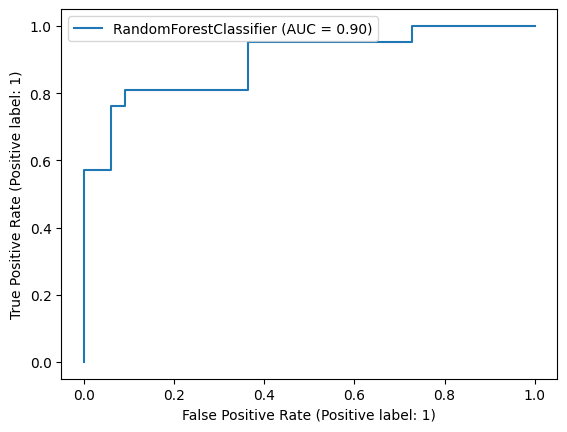

ROC curve plot:


/var/folders/lp/064sgjgn4kn9lkmy_3z3mj3c0000gn/T/ipykernel_6209/3379523930.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


<Figure size 600x600 with 0 Axes>

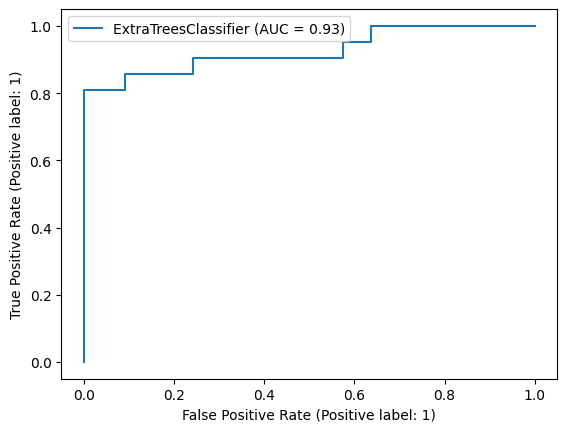

ROC curve plot:


/Users/minkim/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Figure size 600x600 with 0 Axes>

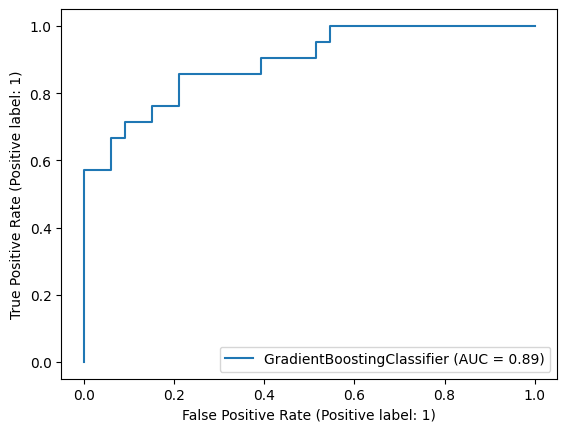

/Users/minkim/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/minkim/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


ROC curve plot:


<Figure size 600x600 with 0 Axes>

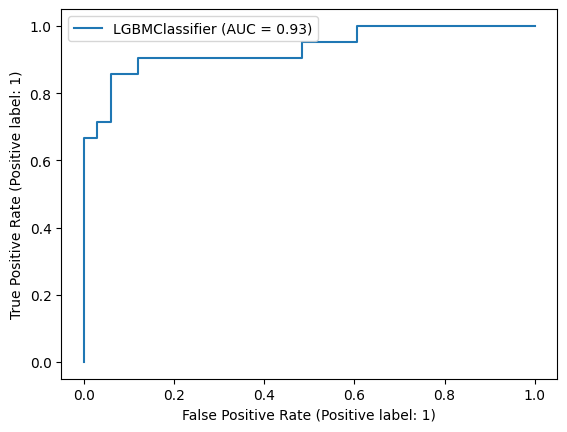

ROC curve plot:


<Figure size 600x600 with 0 Axes>

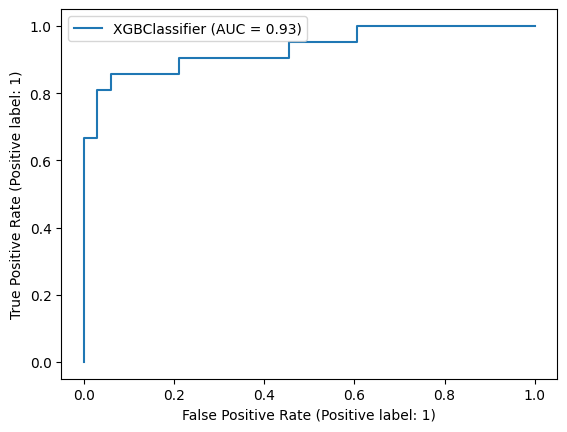

,Model,F1 Score,Accuracy Score,ROC AUC Score
0,RandomForestClassifier,0.800000,0.851852,0.835498
1,ExtraTreesClassifier,0.894737,0.925926,0.904762
2,GradientBoostingClassifier,0.750000,0.814815,0.796537
3,LGBMClassifier,0.777778,0.851852,0.818182
4,XGBClassifier,0.842105,0.888889,0.865801


In [68]:
f1S = []
accuracyS = []
rocaucS = []
algo = []


for model_name, model in models.items():
    f1, accuracy, rocauc = scores(model, X_train, y_train, X_test, y_test)
    roc_plot(model, X_test, y_test)
    
    f1S.append(f1)
    accuracyS.append(accuracy)
    rocaucS.append(rocauc)
    algo.append(model_name)

    results = pd.DataFrame({'Model': algo,
                           'F1 Score': f1S,
                           'Accuracy Score': accuracyS,
                           'ROC AUC Score': rocaucS})
    
results

**Extra Tree**